In [111]:
import sys
del sys.modules["test"]
del sys.modules["matplotlib.pyplot"]

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from GGA import GGA
from ocat import OCAT
from test import CAModel,Testing1
import helpers
import helpers2
from joblib import Parallel, delayed,parallel_backend

# Preprocessing

In [2]:
if not os.path.isfile("data/data.npy"):
    dirName = "data/images"
    images = []
    paths = []
    for file in os.listdir(dirName):
        if (".png" in file):
            paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
    paths = sorted(paths,key=lambda x:x[0])
    for path in paths:
        img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
        images.append(img)
    images=np.array(images)
    values = {}
    count = 0
    for state in images:
        for row in state:
            for j,col in enumerate(row):
                if col not in values:
                    count+=1
                    values[col] = count
                row[j] = values[col]
    np.save("data/data.npy",images)
else:
    print("data.npy already exist")

In [3]:
def getProblemSub2(data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue):
    index = tuple([iState]+cell)
    cls = data[index]
    #start = time.time()
    neighbors = helpers.getNeighbors(cell,neighborhood,stateSize)
    #print("neighbors time {}".format(time.time()-start))
    values = helpers.getNeighborsValue(currentState,neighbors,paddingType,paddingValue)
    #print("neighbors value time {}".format(time.time()-start))
    if values != None:
        values = [values[key] for key in values]
        values.append(cls)
    #print("neighbors value 2 time {}".format(time.time()-start))
    return values
    
def getProblemSub1(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue):
    print(iState)
    currentState = data[iState-1].reshape(-1)
    backend = 'threading'
    with parallel_backend(backend):
        vlscls = Parallel(n_jobs=4)(delayed(getProblemSub2) (data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue) for cell in helpers.multiDimensionalGenerator(stateSize))
        vlscls = list(filter(lambda x: x != None,vlscls))
    return vlscls

def getProblem(data,neighborhood,paddingType,paddingValue):
    problem = []
    dataSize = np.shape(data)
    stateSize = dataSize[1:]
    noStates = dataSize[0]
    backend = 'threading'
    with parallel_backend(backend):
        problem = Parallel(n_jobs=4)(delayed(getProblemSub1)(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue) for iState in range(1,noStates))
        problem = np.concatenate(problem)
    return problem

In [4]:
data= np.load("data/data.npy")

In [5]:
np.shape(data)

(600, 400, 640)

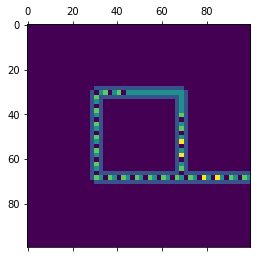

In [6]:
plt.matshow(data[160,150:250,270:370])

In [7]:
radious = 1
neighborhood = helpers.moore([radious,radious])
data = getProblem(data[:160,150:250,270:370],neighborhood,1,-1)

12
34


56

7
8
9
10
1112

13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
4243

44
45
46
4748

49
50
5152

53
54
5556

57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159


In [67]:
modelGGA = GGA(data,np.shape(data)[1]-1,path="saves/Experiment1",verbose=0,noChilds=10,noChromosomes=100)

In [68]:
modelGGA.run()

config saved at saves/Experiment1/06_02_20_14_10_58/config.json
iteration 1
goal = 1
goal = 2goal = 5
goal = 3

goal 1 elapsed time: 1.129042148590088
goal = 4
goal 3 elapsed time: 1.2750442028045654
goal = 6
goal 5 elapsed time: 1.366044521331787
goal 2 elapsed time: 1.6510448455810547
goal 4 elapsed time: 0.8529982566833496
goal 6 elapsed time: 0.7270007133483887
iteration 2
goal = 1
goal = 2goal = 5

goal = 3
goal 1 elapsed time: 0.18399477005004883goal 5 elapsed time: 0.1790006160736084

goal = 4goal = 6
goal 3 elapsed time: 0.18899869918823242

goal 2 elapsed time: 0.2499983310699463
goal 6 elapsed time: 0.12099814414978027
goal 4 elapsed time: 0.1360008716583252
iteration 3
goal = 1goal = 2
goal = 5

goal = 3
goal 2 elapsed time: 0.14600014686584473
goal = 4goal 5 elapsed time: 0.20600485801696777
goal = 6
goal 1 elapsed time: 0.21900272369384766

goal 3 elapsed time: 0.2259998321533203
goal 6 elapsed time: 0.10399365425109863
goal 4 elapsed time: 0.14899992942810059
iteration 4


In [69]:
caggamodel = CAModel(modelGGA.rules,neighborhood,1,-1)

In [70]:
modelOCAT = OCAT(data,np.shape(data)[1]-1)

problem
matrix
domain
binarized
bdomains
indexes
dindex
pos index
neg index
auxiliar
terms


In [71]:
modelOCAT.train()

training for value 1
409
388
220
123
99
94
82
78
69
62
60
56
43
40
38
35
35
34
31
30
29
28
28
27
26
23
23
21
21
21
21
21
21
18
17
17
15
15
15
15
15
15
15
13
12
10
10
9
9
9
9
9
9
9
9
9
9
difficult element 100/1000 to delete it
9
9
9
9
9
9
9
8
8
8
8
8
8
7
6
6
5
5
5
5
5
5
5
5
5
5
difficult element 100/1000 to delete it
5
5
5
5
5
5
5
5
5
5
difficult element 200/1000 to delete it
5
5
5
5
5
5
5
5
5
5
difficult element 300/1000 to delete it
5
4
3
3
3
2
2
2
2
2
2
2
2
2
2
difficult element 100/1000 to delete it
2
2
2
2
2
2
2
2
2
2
difficult element 200/1000 to delete it
2
2
2
2
2
2
2
2
2
2
difficult element 300/1000 to delete it
2
2
2
2
2
2
2
2
2
2
difficult element 400/1000 to delete it
2
2
2
2
2
2
2
2
2
2
difficult element 500/1000 to delete it
2
2
2
2
2
2
2
2
2
2
difficult element 600/1000 to delete it
2
2
2
2
2
2
2
2
2
2
difficult element 700/1000 to delete it
2
2
2
2
1
1
1
1
1
1
1
1
1
1
difficult element 100/1000 to delete it
1
1
1
1
1
1
1
1
1
1
difficult element 200/1000 to delete it
1
1


[[1,
  [{(2, 2, '>='),
    (3, 3, '>='),
    (4, 2, '<'),
    (4, 4, '>='),
    (5, 2, '<'),
    (8, 6, '>=')},
   {(1, 2, '<'), (3, 2, '<'), (4, 4, '>='), (5, 2, '<'), (8, 6, '>=')},
   {(2, 1, '<'), (4, 2, '<'), (4, 4, '>=')},
   {(4, 4, '>='), (6, 2, '<'), (7, 3, '<'), (7, 6, '>=')},
   {(0, 6, '>='), (1, 2, '>='), (3, 5, '<'), (6, 6, '>='), (7, 3, '>=')},
   {(0, 6, '>='),
    (0, 7, '>='),
    (1, 4, '<'),
    (2, 6, '>='),
    (4, 4, '>='),
    (8, 1, '<')},
   {(1, 4, '>='), (5, 4, '<'), (6, 2, '<'), (7, 3, '>=')},
   {(1, 3, '<'), (1, 4, '>='), (3, 4, '>='), (7, 3, '>='), (7, 5, '>=')},
   {(1, 2, '<'),
    (2, 4, '>='),
    (3, 7, '>='),
    (6, 3, '<'),
    (6, 6, '>='),
    (7, 3, '>=')},
   {(0, 6, '>='), (1, 5, '<'), (2, 5, '>='), (2, 7, '>='), (4, 3, '>=')},
   {(1, 4, '>='),
    (2, 3, '<'),
    (2, 4, '>='),
    (2, 7, '>='),
    (4, 4, '>='),
    (6, 2, '<')},
   {(4, 6, '<'), (7, 4, '>=')},
   {(2, 4, '>='), (4, 3, '>='), (5, 5, '<'), (5, 6, '>='), (6, 3, '>=')},
   {

In [72]:
id = 300
count = {}
other = {}
for id in range(len(data)):
    for op in modelOCAT.rules2:
        if modelOCAT.rules2[op](data[id,:-1]) and op == data[id,-1]:
            if op not in count:
                count[op] = 0
            count[op] +=1
            break
        if modelOCAT.rules2[op](data[id,:-1]) and  op != data[id,-1]:
            if op not in other:
                other[op] = 0
            other[op] +=1
            break
count,other

({1: 1440208, 2: 97615, 5: 1153, 3: 21731, 4: 8290, 6: 172},
 {5: 13718, 4: 4936, 3: 1806, 1: 167, 6: 176, 2: 28})

In [73]:
caocatmodel = CAModel(modelOCAT.rules2,neighborhood,1,-1)

In [74]:
data= np.load("data/data.npy")
data = data[:200,150:250,270:370]
data=np.array(data)

In [75]:
data[0].size

10000

Testing:
state 1/200
state 2/200
state 3/200
state 4/200
state 5/200
state 6/200
state 7/200
state 8/200
state 9/200
state 10/200
state 11/200
state 12/200
state 13/200
state 14/200
state 15/200
state 16/200
state 17/200
state 18/200
state 19/200
state 20/200
state 21/200
state 22/200
state 23/200
state 24/200
state 25/200
state 26/200
state 27/200
state 28/200
state 29/200
state 30/200
state 31/200
state 32/200
state 33/200
state 34/200
state 35/200
state 36/200
state 37/200
state 38/200
state 39/200
state 40/200
state 41/200
state 42/200
state 43/200
state 44/200
state 45/200
state 46/200
state 47/200
state 48/200
state 49/200
state 50/200
state 51/200
state 52/200
state 53/200
state 54/200
state 55/200
state 56/200
state 57/200
state 58/200
state 59/200
state 60/200
state 61/200
state 62/200
state 63/200
state 64/200
state 65/200
state 66/200
state 67/200
state 68/200
state 69/200
state 70/200
state 71/200
state 72/200
state 73/200
state 74/200
state 75/200
state 76/200
state 77/200

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

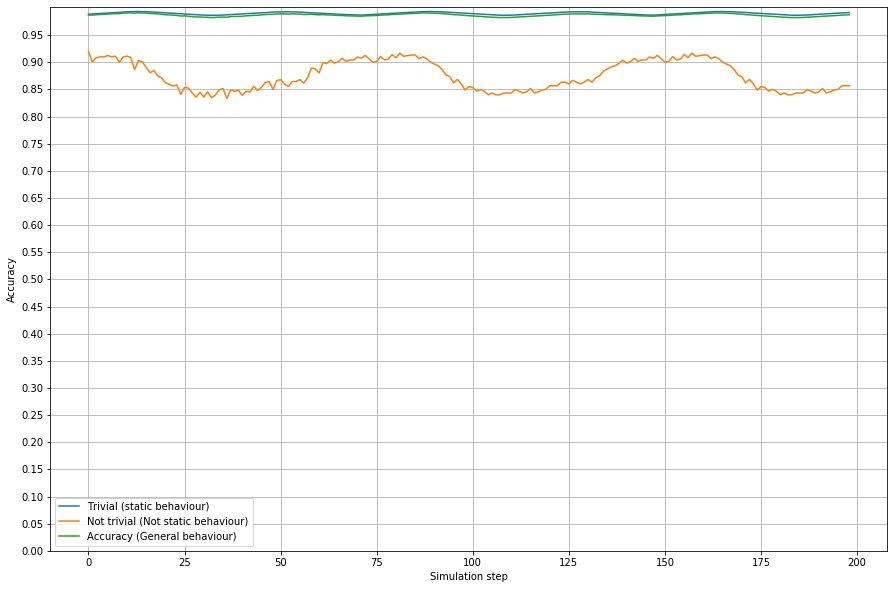

In [117]:
test1 = Testing1(data,caocatmodel,verbose=1)
test1.run()
test1.plot()

Testing:
state 1/200
state 2/200
state 3/200
state 4/200
state 5/200
state 6/200
state 7/200
state 8/200
state 9/200
state 10/200
state 11/200
state 12/200
state 13/200
state 14/200
state 15/200
state 16/200
state 17/200
state 18/200
state 19/200
state 20/200
state 21/200
state 22/200
state 23/200
state 24/200
state 25/200
state 26/200
state 27/200
state 28/200
state 29/200
state 30/200
state 31/200
state 32/200
state 33/200
state 34/200
state 35/200
state 36/200
state 37/200
state 38/200
state 39/200
state 40/200
state 41/200
state 42/200
state 43/200
state 44/200
state 45/200
state 46/200
state 47/200
state 48/200
state 49/200
state 50/200
state 51/200
state 52/200
state 53/200
state 54/200
state 55/200
state 56/200
state 57/200
state 58/200
state 59/200
state 60/200
state 61/200
state 62/200
state 63/200
state 64/200
state 65/200
state 66/200
state 67/200
state 68/200
state 69/200
state 70/200
state 71/200
state 72/200
state 73/200
state 74/200
state 75/200
state 76/200
state 77/200

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

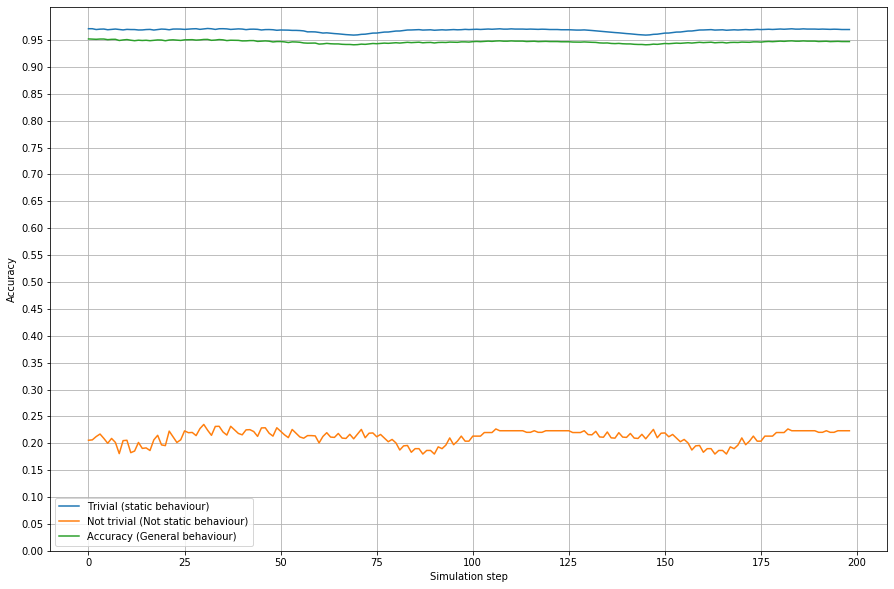

In [119]:
test2 = Testing1(data,caggamodel,verbose=1)
test2.run()
test2.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

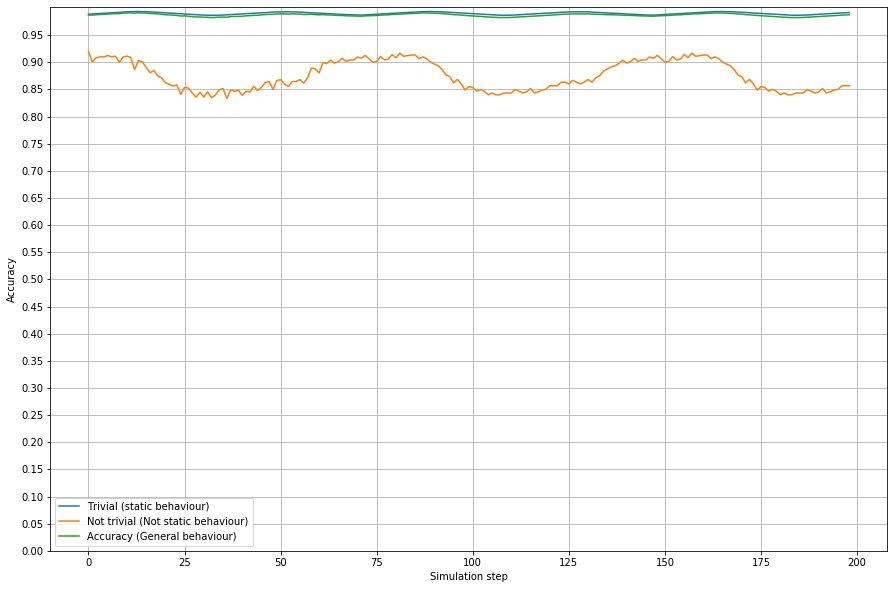

In [120]:
test1.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

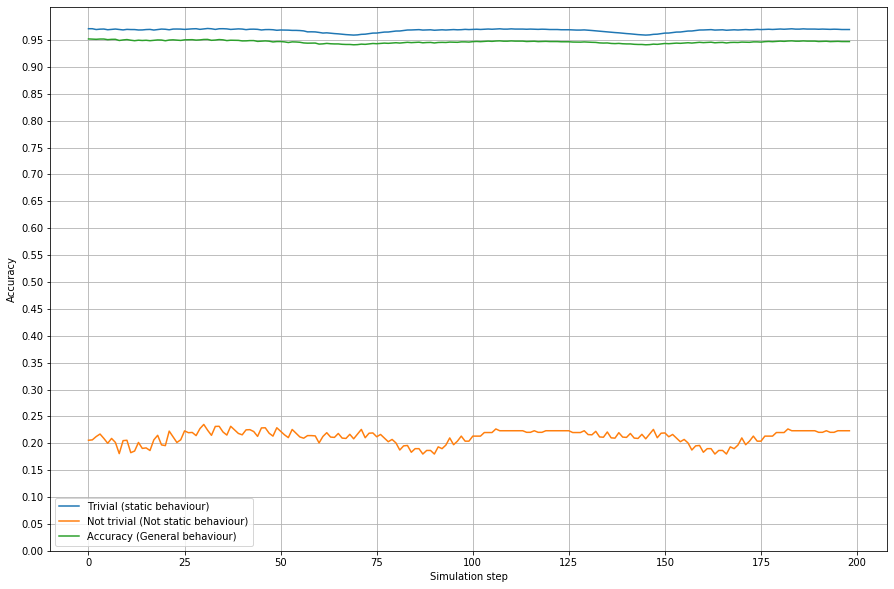

In [121]:
test2.plot()

In [122]:
results_path = f"{modelGGA.path}/{modelGGA.date}"
np.savetxt(f"{results_path}/ocat.csv",test1.result,delimiter=",",header="trivial,nontrivial,accuracy")
np.savetxt(f"{results_path}/gga.csv",test2.result,delimiter=",",header="trivial,nontrivial,accuracy")

In [8]:
res,mn,mx = helpers2.getBinaryStrings(data,data.shape[1]-1)

getting domains
get row number function
lambda x0,x1,x2,x3,x4,x5,x6,x7,x8:14680064*x0+1835008*x1+229376*x2+28672*x3+4096*x4+512*x5+64*x6+8*x7+1*x8
lambda domain,x:[domain[0][x[0]],domain[1][x[1]],domain[2][x[2]],domain[3][x[3]],domain[4][x[4]],domain[5][x[5]],domain[6][x[6]],domain[7][x[7]],domain[8][x[8]]]
building binary strings
string for key1
string for key2
string for key3
string for key4
string for key5
string for key6
string for key1
string for key2
string for key3
string for key4
string for key5
string for key6


In [9]:
from pybdm import BDM 
bdm = BDM(ndim=1)
for k in res:
    val = bdm.bdm(res[k], normalized=True)
    print(k,val)

1 0.007821747231926699
2 0.007821747231926699
3 0.007821747231926699
4 0.007821747231926699
5 0.007821747231926699
6 0.007821747231926699
